In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 정제 
- 옐로우마린 근처 역만 추출 
- 필요없는 칼럼 삭제 : '노선번호','노선명','표준버스정류장ID','버스정류장ARS번호','등록일자'

In [6]:
cau = ['중앙대정문', '중앙대병원', '중앙대학교', '중앙대중문'] # 중앙대 근처 역

# 2021 01월 ~ 08월 데이터
bus_2021 = pd.read_csv('./dataset/서울시 버스 승하차 인원/2021_서울시 버스 승하차 인원.csv',encoding = 'cp949')
bus_2021 = bus_2021[bus_2021['사용년월']>202100] # 202101 ~ 202108
bus_2021 = bus_2021[bus_2021['역명'].isin(cau)] # 옐로우마린 근처 역
bus_2021.drop(columns=['노선번호','노선명','표준버스정류장ID','버스정류장ARS번호','등록일자'],inplace = True) # 불필요한 칼럼 삭젠

# 2020 01월 ~ 12월 데이터
bus_2020 = pd.read_csv('./dataset/서울시 버스 승하차 인원/2020_서울시 버스 승하차 인원.csv',encoding = 'cp949')
bus_2020 = bus_2020[bus_2020['역명'].isin(cau)]
bus_2020.drop(columns=['노선번호','노선명','표준버스정류장ID','버스정류장ARS번호','등록일자'],inplace = True)

# 2019 01월 ~ 12월 데이터
bus_2019 = pd.read_csv('./dataset/서울시 버스 승하차 인원/2019_서울시 버스 승하차 인원.csv',encoding = 'cp949')
bus_2019 = bus_2019[bus_2019['역명'].isin(cau)]
bus_2019.drop(columns=['노선번호','노선명','표준버스정류장ID','버스정류장ARS번호','등록일자','노선ID'],inplace = True)

# 2018 01월 ~ 08월 데이터
bus_2018 = pd.read_csv('./dataset/서울시 버스 승하차 인원/2018_서울시 버스 승하차 인원.csv',encoding = 'cp949')
bus_2018 = bus_2018[bus_2018['use_mon'] < 201809]
bus_2018 = bus_2018[bus_2018['bus_sta_nm'].isin(cau)]
bus_2018.drop(columns=['bus_route_id','bus_route_no','bus_route_nm','stnd_bsst_id','bsst_ars_no'],inplace = True)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
m_2018 = list(set(bus_2018['use_mon']))
m_2019 = list(set(bus_2019['사용년월']))
m_2020 = list(set(bus_2020['사용년월']))
m_2021 = list(set(bus_2021['사용년월']))

print("Before Corona")
print(m_2018)
print(m_2019)
print("\nAfter Corona")
print(m_2020)
print(m_2021)

Before Corona
[201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808]
[201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912]

After Corona
[202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
[202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108]


In [8]:
print("\n2018")
print(bus_2018['bus_sta_nm'].value_counts())
print("\n2019")
print(bus_2019['역명'].value_counts())
print("\n2020")
print(bus_2020['역명'].value_counts())
print("\n2021")
print(bus_2021['역명'].value_counts())



2018
중앙대정문    64
중앙대중문    56
중앙대병원    48
중앙대학교    44
Name: bus_sta_nm, dtype: int64

2019
중앙대정문    96
중앙대중문    84
중앙대병원    74
중앙대학교    72
Name: 역명, dtype: int64

2020
중앙대정문    96
중앙대중문    84
중앙대병원    72
중앙대학교    71
Name: 역명, dtype: int64

2021
중앙대정문    64
중앙대중문    56
중앙대병원    48
중앙대학교    48
Name: 역명, dtype: int64


In [9]:
bus_2019

,사용년월,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,2시승차총승객수,2시하차총승객수,3시승차총승객수,3시하차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
1720,201901,중앙대학교,94,138,0,0,0,0,0,0,...,2445,2190,1952,1873,1771,1760,1826,1739,1207,1551
9753,201901,중앙대정문,4,15,0,0,0,0,0,0,...,56,600,39,562,49,515,38,516,20,256
9754,201901,중앙대학교,26,38,0,0,0,0,0,0,...,474,659,311,689,228,404,238,401,161,262
9756,201901,중앙대정문,171,4,0,0,0,0,0,0,...,1057,180,1159,163,1075,133,979,157,820,117
9757,201901,중앙대중문,18,26,0,0,0,0,0,0,...,189,158,153,115,164,123,175,206,118,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451528,201912,중앙대정문,113,12,0,0,0,0,0,0,...,192,45,188,34,204,27,191,29,121,27
451529,201912,중앙대중문,19,39,0,0,0,0,0,0,...,61,55,44,38,40,50,44,42,40,44
451538,201912,중앙대중문,0,15,0,0,0,0,0,0,...,12,62,19,52,19,60,23,73,7,45
451539,201912,중앙대정문,5,11,0,0,0,0,0,0,...,66,127,59,125,53,90,41,81,28,41


In [10]:
bus_2020

,사용년월,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,2시승차총승객수,2시하차총승객수,3시승차총승객수,3시하차총승객수,...,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수
1761,202001,중앙대학교,96,108,7,12,0,0,0,0,...,2154,1957,1626,1504,1622,1478,1638,1702,983,1339
9767,202001,중앙대학교,17,19,0,0,0,0,0,0,...,409,775,299,593,196,409,208,354,123,283
9770,202001,중앙대정문,1,7,0,0,0,0,0,0,...,58,663,36,530,47,444,44,497,18,325
9771,202001,중앙대중문,26,21,0,0,0,0,0,0,...,159,142,130,114,156,140,195,179,175,167
9772,202001,중앙대정문,125,17,0,0,0,0,0,0,...,1076,161,976,118,1070,145,950,161,693,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455256,202012,중앙대중문,3,0,0,0,0,0,0,0,...,22,16,20,19,26,19,20,17,10,9
455257,202012,중앙대병원,18,0,0,0,0,0,0,0,...,102,9,111,6,132,5,92,5,21,1
455264,202012,중앙대병원,31,5,0,0,0,0,0,0,...,622,115,552,73,539,88,247,57,90,9
455265,202012,중앙대정문,2,1,0,0,0,0,0,0,...,34,55,16,36,16,37,20,19,0,6


- 옐로우 서브마린 운영시간(13-20)에 맞춰서 데이터 추출

In [11]:
bus_2021_ys = pd.concat([bus_2021.iloc[:,:2], bus_2021.iloc[:,28:44]], axis=1)
bus_2020_ys = pd.concat([bus_2020.iloc[:,:2], bus_2020.iloc[:,28:44]], axis=1)
bus_2019_ys = pd.concat([bus_2019.iloc[:,:2], bus_2019.iloc[:,28:44]], axis=1)
bus_2018_ys = pd.concat([bus_2018.iloc[:,:2], bus_2018.iloc[:,28:44]], axis=1)

In [12]:
bus_2018_ys.head()

,use_mon,bus_sta_nm,thirteen_ride_num,thirteen_alight_num,fourteen_ride_num,fourteen_alight_num,fifteen_ride_num,fifteen_alight_num,sixteen_ride_num,sixteen_alight_num,seventeen_ride_num,seventeen_alight_num,eighteen_ride_num,eighteen_alight_num,nineteen_ride_num,nineteen_alight_num,twenty_ride_num,twenty_alight_num
1677,201801,중앙대학교,3483,1641,3510,1541,3774,1497,3895,1534,4244,1853,3598,2002,2434,2089,1879,1954
9881,201801,중앙대정문,51,807,52,732,116,627,126,599,126,679,116,703,44,562,63,473
9883,201801,중앙대정문,759,159,936,168,1039,144,1262,179,1298,138,1373,210,1061,167,1066,171
9884,201801,중앙대중문,174,166,170,141,176,140,293,140,271,99,263,145,183,142,152,103
9896,201801,중앙대학교,253,975,312,746,408,816,511,800,704,809,641,886,387,578,244,478


In [13]:
bus_2019_ys.head()

,사용년월,역명,13시승차총승객수,13시하차총승객수,14시승차총승객수,14시하차총승객수,15시승차총승객수,15시하차총승객수,16시승차총승객수,16시하차총승객수,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수
1720,201901,중앙대학교,3425,1634,3631,1430,3907,1603,4129,1633,4607,1703,3606,2189,2445,2190,1952,1873
9753,201901,중앙대정문,48,866,56,747,81,660,213,563,139,684,98,895,56,600,39,562
9754,201901,중앙대학교,222,1222,367,1002,486,1060,539,1121,609,991,795,1041,474,659,311,689
9756,201901,중앙대정문,757,128,1012,178,1163,118,1428,138,1261,156,1230,178,1057,180,1159,163
9757,201901,중앙대중문,190,152,204,151,190,131,308,152,244,110,231,173,189,158,153,115


- 유동인구 계산 (승차+하차)

In [14]:
bus = [bus_2021_ys,bus_2020_ys,bus_2019_ys,bus_2018_ys]
bus_total = []

for df in bus :
    bus_deleted = pd.DataFrame()
    bus_deleted['사용년월'] = df.iloc[:,0]
    bus_deleted['역명'] = df.iloc[:,1]

    # add
    for i in range(8):
        bus_deleted[str(i+13)+'시'] = df.iloc[:,2+(2*i)] + df.iloc[:,3+(2*i)]
    bus_total.append(bus_deleted)

In [15]:
bus_total[0]['역명'].value_counts() # 2021 년

중앙대정문    64
중앙대중문    56
중앙대병원    48
중앙대학교    48
Name: 역명, dtype: int64

In [16]:
bus_total[1]['역명'].value_counts() # 2020 년

중앙대정문    96
중앙대중문    84
중앙대병원    72
중앙대학교    71
Name: 역명, dtype: int64

In [17]:
bus_total[2]['역명'].value_counts() # 2019 년

중앙대정문    96
중앙대중문    84
중앙대병원    74
중앙대학교    72
Name: 역명, dtype: int64

In [18]:
bus_total[3]['역명'].value_counts() # 2018 년

중앙대정문    64
중앙대중문    56
중앙대병원    48
중앙대학교    44
Name: 역명, dtype: int64

# 데이터 정제 완료

In [19]:
b_2021 = bus_total[0]
b_2020 = bus_total[1]
b_2019 = bus_total[2]
b_2018 = bus_total[3]

In [20]:
b_2020

,사용년월,역명,13시,14시,15시,16시,17시,18시,19시,20시
1761,202001,중앙대학교,4436,4426,4833,4895,5519,5151,4111,3130
9767,202001,중앙대학교,1588,1354,1621,1507,1400,1805,1184,892
9770,202001,중앙대정문,822,790,724,781,860,930,721,566
9771,202001,중앙대중문,327,254,367,430,383,331,301,244
9772,202001,중앙대정문,964,1101,1238,1515,1244,1387,1237,1094
...,...,...,...,...,...,...,...,...,...,...
455256,202012,중앙대중문,42,31,43,62,49,44,38,39
455257,202012,중앙대병원,111,112,124,184,164,159,111,117
455264,202012,중앙대병원,536,476,840,846,763,947,737,625
455265,202012,중앙대정문,89,72,98,94,105,103,89,52


## 코로나 전/후 데이터 나누기

In [21]:
before = pd.concat([b_2019,b_2018]) # 코로나 이전 201801 ~ 201808 , 201901~201912
after = pd.concat([b_2020,b_2021]) # 코로나 이후 202001 ~ 202108

In [22]:
before['역명'].value_counts()

중앙대정문    160
중앙대중문    140
중앙대병원    122
중앙대학교    116
Name: 역명, dtype: int64

In [23]:
after['역명'].value_counts()

중앙대정문    160
중앙대중문    140
중앙대병원    120
중앙대학교    119
Name: 역명, dtype: int64

## 역별 평균 유동인구 계산

In [24]:
before_mean = before.groupby(['역명']).mean().reset_index().drop(columns='사용년월')
after_mean = after.groupby(['역명']).mean().reset_index().drop(columns='사용년월')

In [25]:
before_mean

,역명,13시,14시,15시,16시,17시,18시,19시,20시
0,중앙대병원,1342.622951,1374.811475,1512.581967,1702.377049,1832.836066,2029.491803,1826.909836,1475.540984
1,중앙대정문,783.637500,765.793750,801.218750,942.543750,994.618750,1052.375000,857.206250,760.237500
2,중앙대중문,362.592857,355.442857,337.400000,378.164286,419.435714,447.835714,346.071429,284.264286
3,중앙대학교,2003.551724,2055.508621,2265.870690,2435.362069,2716.844828,2541.137931,1956.267241,1697.387931


In [26]:
after_mean

,역명,13시,14시,15시,16시,17시,18시,19시,20시
0,중앙대병원,930.683333,952.600000,1072.141667,1136.266667,1271.508333,1433.250000,1234.500000,955.158333
1,중앙대정문,451.650000,449.618750,489.993750,554.850000,586.912500,629.125000,491.481250,432.700000
2,중앙대중문,203.721429,190.671429,218.757143,232.700000,262.621429,274.792857,210.371429,171.457143
3,중앙대학교,1288.899160,1327.361345,1434.428571,1459.739496,1676.084034,1530.420168,1128.084034,984.899160


## 코로나 이전 유동인구

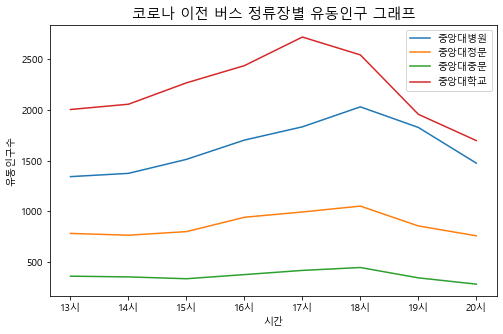

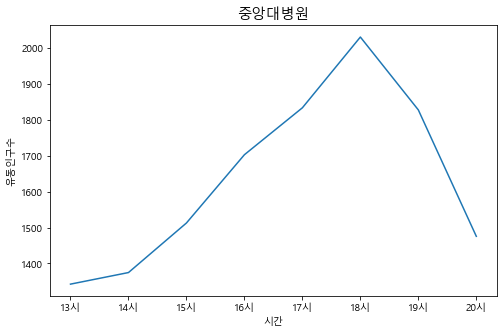

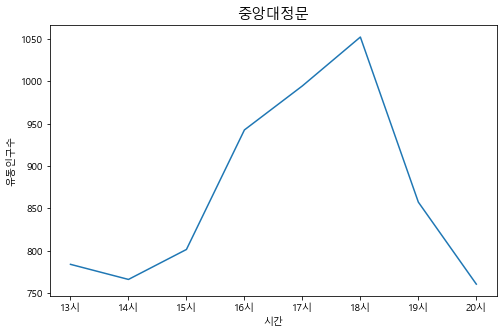

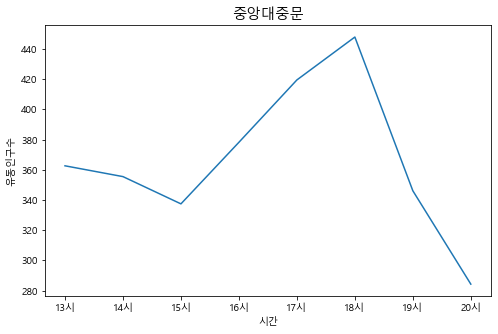

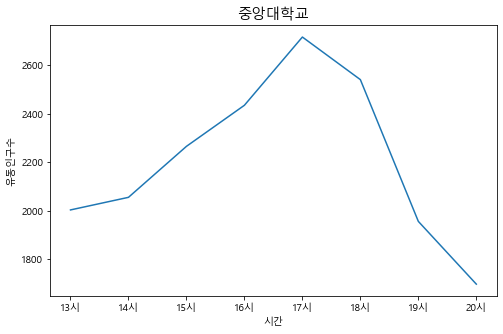

In [29]:
#1) 정류장별 그래프 그리기_merged_계속 figsize 바꾸면 다른 그래프로 출력됨.(for loop)
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/MALGUN.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(8, 5))
plt.xlabel('시간')
plt.ylabel('유동인구수')
plt.title('코로나 이전 버스 정류장별 유동인구 그래프', fontsize='x-large')

for i in range(len(before_mean.index)):
    df_plot_merged = before_mean.iloc[i, 1:]
    plt.plot(df_plot_merged, label = before_mean['역명'][i])
    plt.legend(fontsize='medium')
    
#2) 정류장별 그래프_separated
for j in range(len(before_mean.index)):
    df_plot_separated = before_mean.iloc[j, 1:]
    plt.figure(figsize=(8, 5))
    plt.plot(df_plot_separated)
    plt.title(before_mean['역명'][j], fontsize='x-large')
    plt.xlabel('시간')
    plt.ylabel('유동인구수')
    plt.show()

## 코로나 이후 유동인구

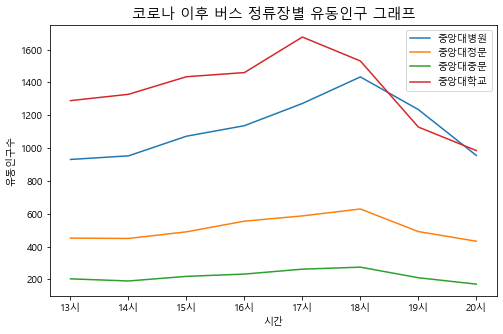

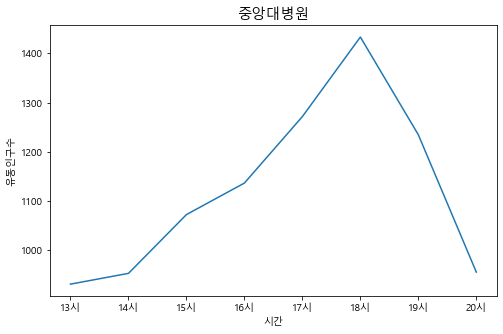

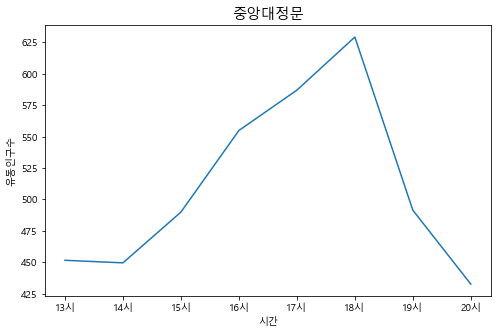

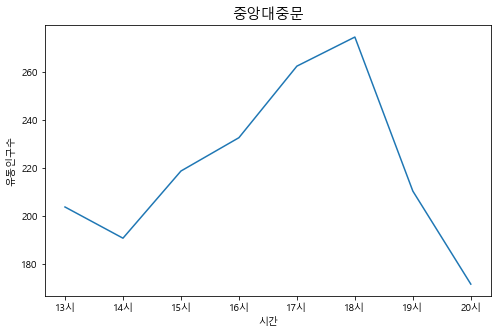

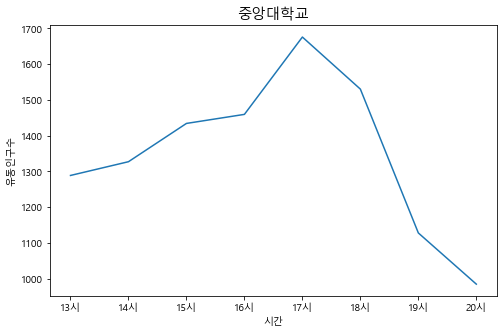

In [31]:
#1) 정류장별 그래프 그리기_merged_계속 figsize 바꾸면 다른 그래프로 출력됨.(for loop)
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/MALGUN.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(8, 5))
plt.xlabel('시간')
plt.ylabel('유동인구수')
plt.title('코로나 이후 버스 정류장별 유동인구 그래프', fontsize='x-large')

for i in range(len(after_mean.index)):
    df_plot_merged = after_mean.iloc[i, 1:]
    plt.plot(df_plot_merged, label = after_mean['역명'][i])
    plt.legend(fontsize='medium')
    
#2) 정류장별 그래프_separated
for j in range(len(after_mean.index)):
    df_plot_separated = after_mean.iloc[j, 1:]
    plt.figure(figsize=(8, 5))
    plt.plot(df_plot_separated)
    plt.title(after_mean['역명'][j], fontsize='x-large')
    plt.xlabel('시간')
    plt.ylabel('유동인구수')
    plt.show()

## 코로나 이전/이후 비교

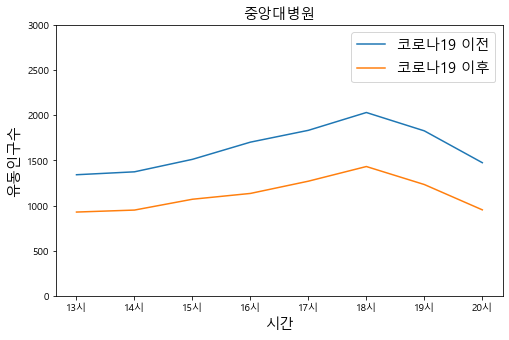

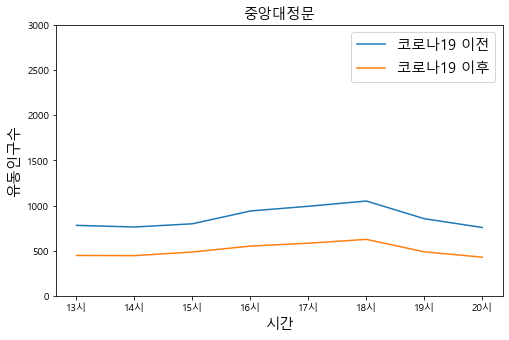

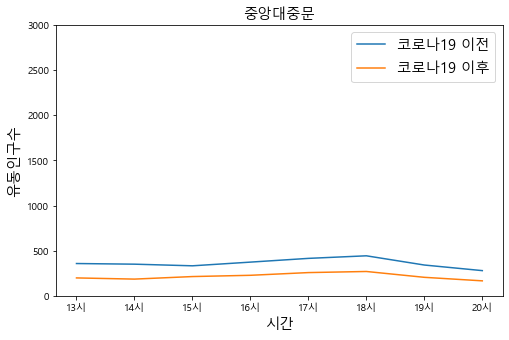

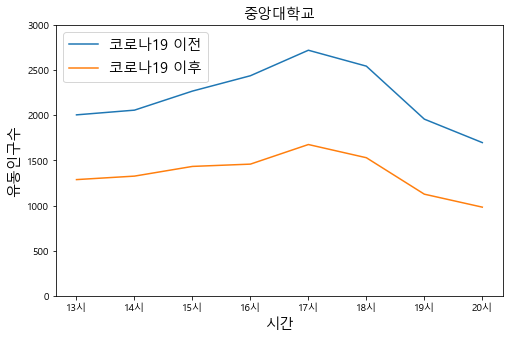

In [38]:
for k in range(len(before_mean.index)):
    df_plot_separated_comp1 = before_mean.iloc[k, 1:]
    df_plot_separated_comp2 = after_mean.iloc[k, 1:]
    plt.figure(figsize=(8, 5))
    plt.plot(df_plot_separated_comp1, label = '코로나19 이전')
    plt.plot(df_plot_separated_comp2, label = '코로나19 이후')
    plt.ylim(0,3000)
    plt.title(after_mean['역명'][k], fontsize='x-large')
    plt.xlabel('시간', fontsize = 'x-large')
    plt.ylabel('유동인구수', fontsize = 'x-large')
    plt.legend(fontsize='x-large')
    plt.show()

<ipython-input-36-a59bdfb28a12>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-36-a59bdfb28a12>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


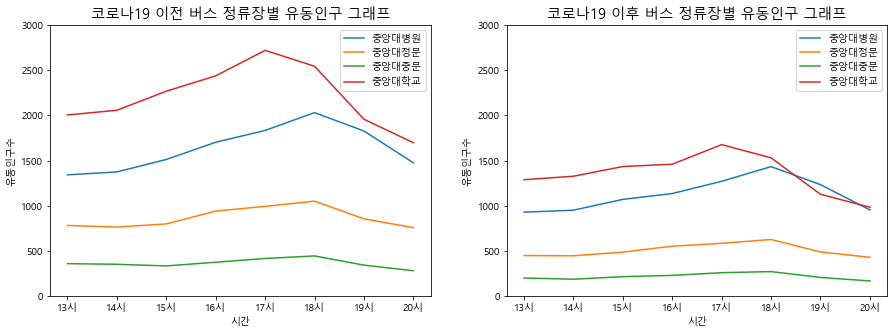

In [36]:
#1) 정류장별 그래프 그리기_merged_계속 figsize 바꾸면 다른 그래프로 출력됨.(for loop)
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/MALGUN.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(15, 5))

# 코로나 이전
for i in range(len(before_mean.index)):
    plt.ylim(0,3000)
    plt.xlabel('시간')
    plt.ylabel('유동인구수')
    df_plot_merged = before_mean.iloc[i, 1:]
    plt.subplot(1,2,1)
    plt.plot(df_plot_merged, label = before_mean['역명'][i])
    plt.legend(fontsize='medium')
    plt.title('코로나19 이전 버스 정류장별 유동인구 그래프', fontsize='x-large')
    
# 코로나 이후
for i in range(len(after_mean.index)):
    plt.ylim(0,3000)
    plt.xlabel('시간')
    plt.ylabel('유동인구수')
    df_plot_merged = after_mean.iloc[i, 1:]
    plt.subplot(1,2,2)
    plt.plot(df_plot_merged, label = after_mean['역명'][i])
    plt.legend(fontsize='medium')
    plt.title('코로나19 이후 버스 정류장별 유동인구 그래프', fontsize='x-large')